In [1]:
import json

In [2]:
j = json.load(open(
    'testData/3cf80417-bd75-4f81-bb56-713970f1cfb2.json')
)

In [3]:
j['metadata']

{'baseRate': 0.1,
 'parameters': {'baseRate': 0.1,
  'fprMutationMagnitude': 0.05,
  'fprMutationRate': 0.8},
 'policy': 'PUBLICATIONS',
 'syncEvery': 2000}

In [4]:
j.keys()

dict_keys(['metadata', 'funds', 'falsePositiveRate', 'nPublications'])

In [5]:
fpr = np.array(j['falsePositiveRate'])
fpr.shape

(10, 500, 100)

In [6]:
fpr.mean(axis=-1).shape

(10, 500)

In [9]:
m = fpr.mean(axis=(0,2))

In [10]:
m.shape

(500,)

Text(0.5,0.5,"{'baseRate': 0.1, 'syncEvery': 2000, 'policy': 'PUBLICATIONS', 'parameters': {'baseRate': 0.1, 'fprMutationMagnitude': 0.05, 'fprMutationRate': 0.8}}")

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


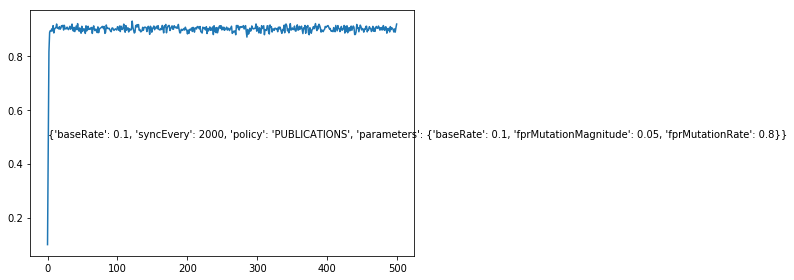

In [12]:
plt.plot(m)
plt.text(0.5, 0.5, j['metadata'])

In [19]:
from glob import glob
jsons = (json.load(open(f)) 
         for f in glob('mutationParameters/*.json'))
def get_mutation_params(j):
    params = j['metadata']['parameters']
    return (params['fprMutationRate'], params['fprMutationMagnitude'], j['metadata']['policy'])
jdict = {get_mutation_params(j): np.array(j['falsePositiveRate']).mean(axis=0) for j in jsons}

In [20]:
jdict.keys()

dict_keys([(0.95, 0.01, 'PUBLICATIONS'), (0.01, 0.05, 'PUBLICATIONS'), (0.95, 0.05, 'PUBLICATIONS'), (0.95, 0.05, 'RANDOM'), (0.25, 0.01, 'RANDOM'), (0.25, 0.05, 'PUBLICATIONS'), (0.25, 0.01, 'PUBLICATIONS'), (0.01, 0.01, 'PUBLICATIONS'), (0.01, 0.01, 'RANDOM'), (0.25, 0.05, 'RANDOM'), (0.95, 0.01, 'RANDOM'), (0.01, 0.05, 'RANDOM')])

In [35]:
plot_order = [(k[0], k[1]) for k in jdict.keys()]
print(plot_order[0][0])
print(type(plot_order[0][0]))
plot_order.sort(key=lambda x: x[1])
plot_order.sort(key=lambda x: x[0])
plot_order = np.array(plot_order)
print(plot_order)

0.95
<class 'float'>
[[0.01 0.01]
 [0.01 0.01]
 [0.01 0.05]
 [0.01 0.05]
 [0.25 0.01]
 [0.25 0.01]
 [0.25 0.05]
 [0.25 0.05]
 [0.95 0.01]
 [0.95 0.01]
 [0.95 0.05]
 [0.95 0.05]]


In [36]:
rates = np.unique(plot_order[:, 0])
magnitudes = np.unique(plot_order[:, 1])
print(rates.dtype)
print(magnitudes)

float64
[0.01 0.05]


In [76]:
400000. % 2e5


0.0

[-200000.0, 0.0, 200000.0, 400000.0, 600000.0, 800000.0, 1000000.0, 1200000.0]
8
[-200000.0, 0.0, 200000.0, 400000.0, 600000.0, 800000.0, 1000000.0, 1200000.0]
8


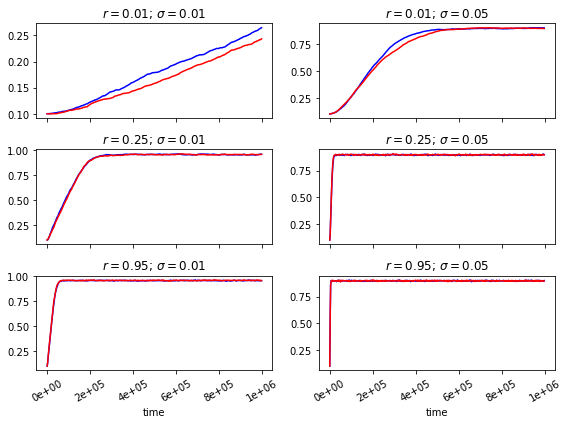

In [93]:
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))

# from matplotlib import ticker
# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# formatter.set_powerlimits((0, 7))

for rate_idx, rate in enumerate(rates):
    for mag_idx, mag in enumerate(magnitudes):
        random_fpr = jdict[(rate, mag, 'RANDOM')]
        publications_fpr = jdict[(rate, mag, 'PUBLICATIONS')]
        x = np.arange(0, 1e6, 2000)
#         print(x[:10])
        ax = axes[rate_idx, mag_idx]
        ax.plot(x, random_fpr, color='blue')
        ax.plot(x, publications_fpr, color='red')
#         ax.ticklabel_format(axis='x', style='sci')
        
        if rate_idx == 2:
#             labels = [
#             '{:e}'.format(el) if el % 2e5 == 0 else '' for el in x
#         ]
#             print(labels)
            print(list(ax.get_xticks()))
            ax.set_xlabel('time')
            print(len(ax.get_xticks()))
            ax.set_xticklabels(
                ['{:1.0e}'.format(el) for el in ax.get_xticks()],
                rotation=30
            )
        else:
            ax.set_xticklabels('' for el in ax.get_xticks())
        
        ax.set_title(r"$r={}$; $\sigma={}$".format(rate, mag))
# plt.ticklabel_format(axis='x', style='sci')
plt.savefig('test.pdf')